In [5]:
import os

import numpy as np
import matplotlib.pyplot as plt

import openfoamparser as ofpp

In [6]:
resultsfolder = "vortexMerge_comparison"
expfolders = ["vortexMerge_icoFoam", "vortexMerge_vortiFoam"]
fields = ["U", "p", "omega", "psi"]
imshape = 256, 256
timelabels = [f"{t:g}" for t in np.arange(1, 20.1, step=1)]
timeticks = [float(t) for t in timelabels]

np.save(os.path.join(resultsfolder, "data_timeticks"), timeticks)

all_data = {}
for expfolder in expfolders:
    all_data[expfolder] = {}


In [7]:
def error_time_plot(xs, ys, title, xlabel, ylabel, fname=None):
    plt.plot(xs, ys)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid(axis="y")

    step_ticks = 4
    idx_ticks = [i for i in range(0, len(xs), step_ticks)]
    if idx_ticks[-1] != len(xs) -1:
        idx_ticks += [len(xs)-1]
    tick_xs = [xs[i] for i in idx_ticks]
    tick_labels = [str(x) for x in tick_xs]
    plt.xticks(ticks=tick_xs, labels=tick_labels)

    if fname:
        plt.savefig(fname)

    plt.show()
    plt.close()

def im_plot(data, title, xlabel, ylabel, fname=None, flip_y=True):
    if flip_y:
        data = np.flip(data, axis=1)
        
    plt.imshow(data)
    plt.colorbar()

    plt.title(title)
    plt.xlabel(xlabel)

    if fname:
        plt.savefig(fname)

    plt.show()
    plt.close()

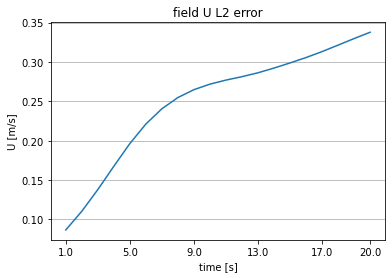

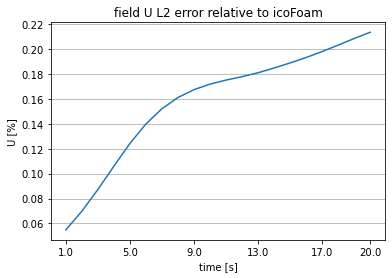

In [8]:
field = "U"
for expfolder in expfolders:
    fields = []
    for timestamp in timelabels:
        fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, field))

        if len(fdata.shape) > 1:
            showdata = fdata.reshape((*imshape, fdata.shape[-1]))
        else:
            tmpshape = (*imshape, fdata.shape[-1])
            showdata = np.full(tmpshape, fdata)

        fields.append(showdata)

    all_data[expfolder][field] = np.array(fields)

np.save(os.path.join(resultsfolder, f"data_{field}_icoFoam"), all_data["vortexMerge_icoFoam"][field])
np.save(os.path.join(resultsfolder, f"data_{field}_vortiFoam"), all_data["vortexMerge_vortiFoam"][field])

diff = all_data["vortexMerge_icoFoam"][field] - all_data["vortexMerge_vortiFoam"][field]
diff = diff.reshape(len(timeticks), -1)
diff_norm = np.linalg.norm(diff, axis=-1)

error_time_plot(timeticks, diff_norm, 
          title=f"field {field} L2 error", 
          xlabel="time [s]", 
          ylabel=f"{field} [m/s]",
          fname=os.path.join(resultsfolder, f"evolution_{field}_diff_norm.png")
          )

refs_norms = np.linalg.norm(all_data["vortexMerge_icoFoam"][field].reshape(len(timeticks), -1))
diff_refs = diff_norm / refs_norms

error_time_plot(timeticks, 100 * diff_refs, 
          title=f"field {field} L2 error relative to icoFoam", 
          xlabel="time [s]", 
          ylabel=f"{field} [%]",
          fname=os.path.join(resultsfolder, f"evolution_{field}_diff_ref_norm.png")
          )

# diff_max = np.amax(np.abs(diff), axis=-1)
# error_time_plot(timeticks, diff_max, 
#           title=f"field {field} max abs error relative to icoFoam", 
#           xlabel="time [s]", 
#           ylabel=f"{field} [%]",
#           fname=os.path.join(resultsfolder, f"evolution_{field}_diff_abs.png")
#           )

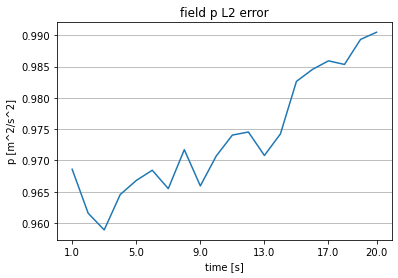

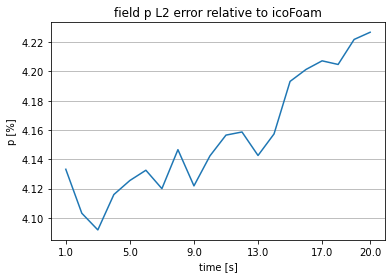

In [9]:
field = "p"
for expfolder in expfolders:
    fields = []
    for timestamp in timelabels:
        fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, field))

        try:
            showdata = fdata.reshape(imshape)
        except AttributeError:
            showdata = np.full(imshape, fdata)

        fields.append(showdata)

    all_data[expfolder][field] = np.array(fields)

np.save(os.path.join(resultsfolder, f"data_{field}_icoFoam"), all_data["vortexMerge_icoFoam"][field])
np.save(os.path.join(resultsfolder, f"data_{field}_vortiFoam"), all_data["vortexMerge_vortiFoam"][field])

diff = all_data["vortexMerge_icoFoam"][field] - all_data["vortexMerge_vortiFoam"][field]
diff = diff.reshape(len(timeticks), -1)
diff_norm = np.linalg.norm(diff, axis=-1)

error_time_plot(timeticks, diff_norm, 
          title=f"field {field} L2 error", 
          xlabel="time [s]", 
          ylabel=f"{field} [m^2/s^2]",
          fname=os.path.join(resultsfolder, f"evolution_{field}_diff_norm.png")
          )

refs_norms = np.linalg.norm(all_data["vortexMerge_icoFoam"][field].reshape(len(timeticks), -1))
diff_refs = diff_norm / refs_norms

error_time_plot(timeticks, 100 * diff_refs, 
          title=f"field {field} L2 error relative to icoFoam", 
          xlabel="time [s]", 
          ylabel=f"{field} [%]",
          fname=os.path.join(resultsfolder, f"evolution_{field}_diff_ref_norm.png")
          )

# diff_max = np.amax(np.abs(diff), axis=-1)
# error_time_plot(timeticks, diff_max, 
#           title=f"field {field} max abs error relative to icoFoam", 
#           xlabel="time [s]", 
#           ylabel=f"{field} [%]",
#           fname=os.path.join(resultsfolder, f"evolution_{field}_diff_abs.png")
#           )

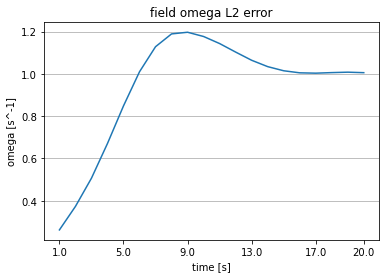

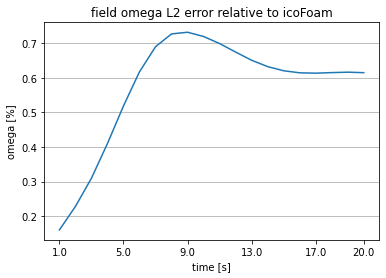

In [10]:
field = "omega"

expfolder = "vortexMerge_vortiFoam"
fields = []
for timestamp in timelabels:
    fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, field))

    try:
        showdata = fdata.reshape(imshape)
    except AttributeError:
        showdata = np.full(imshape, fdata)

    fields.append(showdata)

all_data[expfolder][field] = fields

expfolder = "vortexMerge_icoFoam"
fields = []
for timestamp in timelabels:
    fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, field))

    try:
        showdata = fdata.reshape(imshape)
    except AttributeError:
        showdata = np.full(imshape, fdata)

    fields.append(showdata)

all_data[expfolder][field] = np.array(fields)

np.save(os.path.join(resultsfolder, f"data_{field}_icoFoam"), all_data["vortexMerge_icoFoam"][field])
np.save(os.path.join(resultsfolder, f"data_{field}_vortiFoam"), all_data["vortexMerge_vortiFoam"][field])

diff = all_data["vortexMerge_icoFoam"][field] - all_data["vortexMerge_vortiFoam"][field]
diff = diff.reshape(len(timeticks), -1)
diff_norm = np.linalg.norm(diff, axis=-1)

error_time_plot(timeticks, diff_norm, 
          title=f"field {field} L2 error", 
          xlabel="time [s]", 
          ylabel=f"{field} [s^-1]",
          fname=os.path.join(resultsfolder, f"evolution_{field}_diff_norm.png")
          )

refs_norms = np.linalg.norm(all_data["vortexMerge_icoFoam"][field].reshape(len(timeticks), -1))
diff_refs = diff_norm / refs_norms

error_time_plot(timeticks, 100 * diff_refs, 
          title=f"field {field} L2 error relative to icoFoam", 
          xlabel="time [s]", 
          ylabel=f"{field} [%]",
          fname=os.path.join(resultsfolder, f"evolution_{field}_diff_ref_norm.png")
          )

# diff_max = np.amax(np.abs(diff), axis=-1)
# error_time_plot(timeticks, diff_max, 
#           title=f"field {field} max abs error relative to icoFoam", 
#           xlabel="time [s]", 
#           ylabel=f"{field} [%]",
#           fname=os.path.join(resultsfolder, f"evolution_{field}_diff_abs.png")
#           )

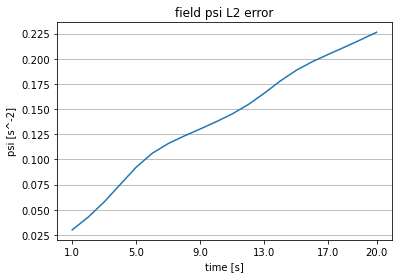

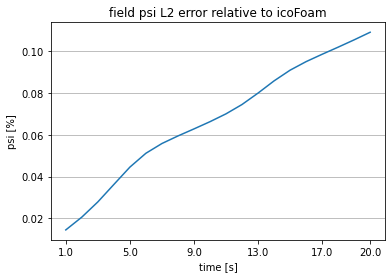

In [11]:
field = "psi"

expfolder = "vortexMerge_vortiFoam"
fields = []
for timestamp in timelabels:
    fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, field))
    
    try:
        showdata = fdata.reshape(imshape)
    except AttributeError:
        showdata = np.full(imshape, fdata)

    fields.append(showdata)

all_data[expfolder][field] = np.array(fields)

expfolder = "vortexMerge_icoFoam"
fields = []
for timestamp in timelabels:
    fdata, meta = ofpp.parse_field_all(os.path.join(expfolder, timestamp, field))
    
    try:
        showdata = fdata.reshape(imshape)
    except AttributeError:
        showdata = np.full(imshape, fdata)

    fields.append(showdata)

all_data[expfolder][field] = np.array(fields)

np.save(os.path.join(resultsfolder, f"data_{field}_icoFoam"), all_data["vortexMerge_icoFoam"][field])
np.save(os.path.join(resultsfolder, f"data_{field}_vortiFoam"), all_data["vortexMerge_vortiFoam"][field])

diff = all_data["vortexMerge_icoFoam"][field] - all_data["vortexMerge_vortiFoam"][field]
diff = diff.reshape(len(timeticks), -1)
diff_norm = np.linalg.norm(diff, axis=-1)

error_time_plot(timeticks, diff_norm, 
          title=f"field {field} L2 error", 
          xlabel="time [s]", 
          ylabel=f"{field} [s^-2]",
          fname=os.path.join(resultsfolder, f"evolution_{field}_diff_norm.png")
          )

refs_norms = np.linalg.norm(all_data["vortexMerge_icoFoam"][field].reshape(len(timeticks), -1))
diff_refs = diff_norm / refs_norms

error_time_plot(timeticks, 100 * diff_refs, 
          title=f"field {field} L2 error relative to icoFoam", 
          xlabel="time [s]", 
          ylabel=f"{field} [%]",
          fname=os.path.join(resultsfolder, f"evolution_{field}_diff_ref_norm.png")
          )

# diff_max = np.amax(np.abs(diff), axis=-1)
# error_time_plot(timeticks, diff_max, 
#           title=f"field {field} max abs error relative to icoFoam", 
#           xlabel="time [s]", 
#           ylabel=f"{field} [%]",
#           fname=os.path.join(resultsfolder, f"evolution_{field}_diff_abs.png")
#           )

p_ico min -0.07200 max 0.00000
p_vorti min -0.07599 max -0.00048


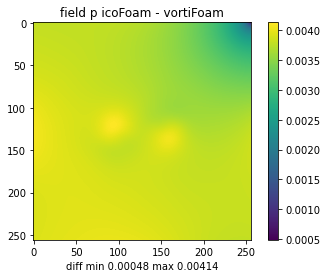

p_ico min -0.07100 max 0.00000
p_vorti min -0.07513 max -0.00048


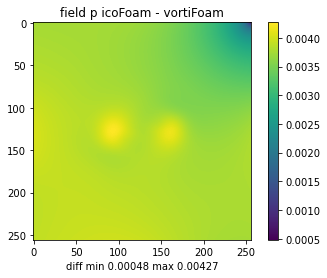

p_ico min -0.06994 max 0.00000
p_vorti min -0.07417 max -0.00048


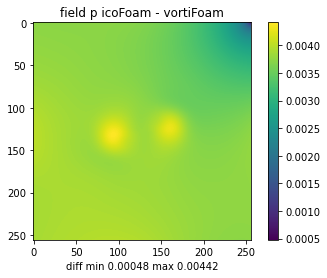

p_ico min -0.06891 max 0.00000
p_vorti min -0.07325 max -0.00048


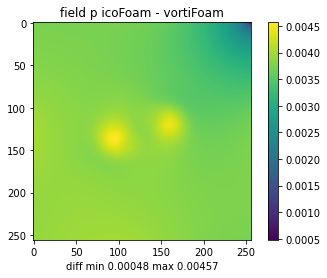

p_ico min -0.06799 max 0.00000
p_vorti min -0.07235 max -0.00048


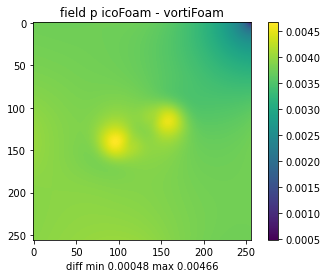

p_ico min -0.06718 max 0.00000
p_vorti min -0.07155 max -0.00048


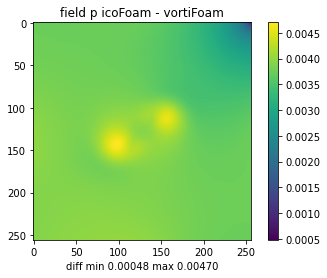

p_ico min -0.06657 max 0.00000
p_vorti min -0.07087 max -0.00048


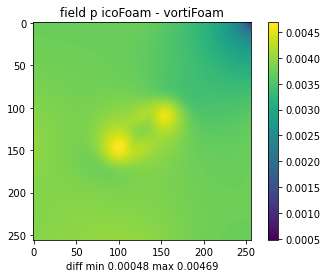

p_ico min -0.06613 max 0.00000
p_vorti min -0.07041 max -0.00048


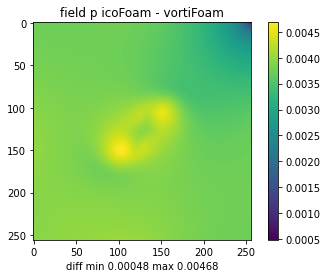

p_ico min -0.06585 max 0.00000
p_vorti min -0.07009 max -0.00048


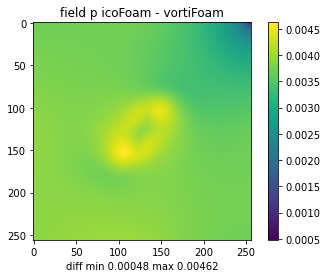

p_ico min -0.06573 max 0.00000
p_vorti min -0.06998 max -0.00048


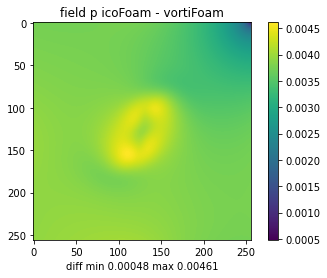

p_ico min -0.06584 max 0.00000
p_vorti min -0.07006 max -0.00049


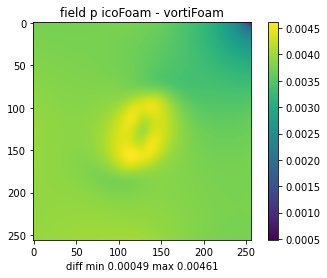

p_ico min -0.06614 max 0.00000
p_vorti min -0.07028 max -0.00049


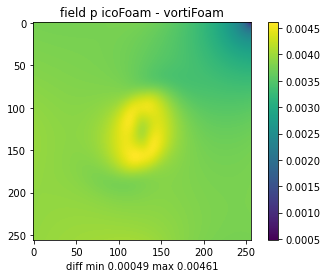

p_ico min -0.06647 max 0.00000
p_vorti min -0.07059 max -0.00048


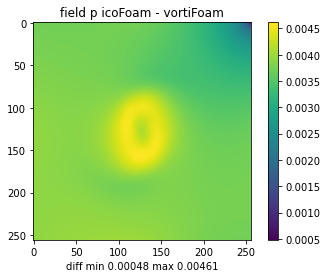

p_ico min -0.06663 max 0.00000
p_vorti min -0.07081 max -0.00048


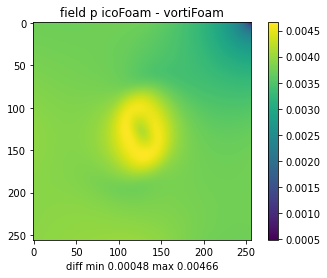

p_ico min -0.06665 max 0.00000
p_vorti min -0.07091 max -0.00049


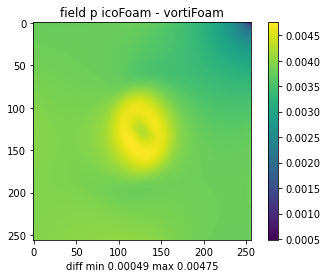

p_ico min -0.06655 max 0.00016
p_vorti min -0.07085 max -0.00049


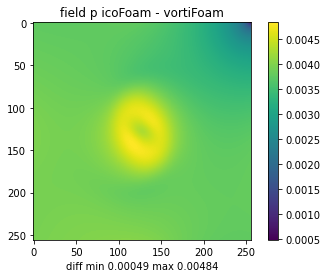

p_ico min -0.06636 max 0.00098
p_vorti min -0.07070 max -0.00049


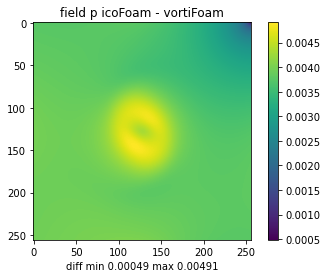

p_ico min -0.06610 max 0.00166
p_vorti min -0.07046 max -0.00048


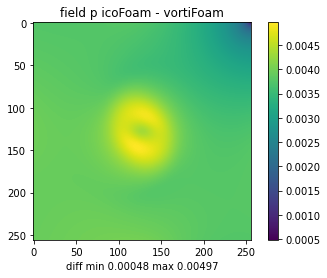

p_ico min -0.06577 max 0.00221
p_vorti min -0.07018 max -0.00048


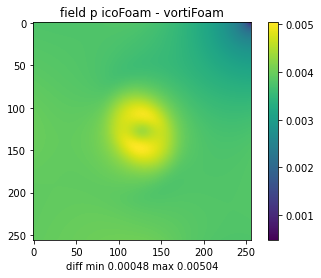

p_ico min -0.06541 max 0.00263
p_vorti min -0.06985 max -0.00048


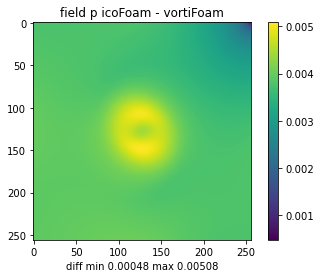

In [12]:
field = "p"

field_ico = np.load(os.path.join(resultsfolder, f"data_{field}_icoFoam.npy"))
field_vorti = np.load(os.path.join(resultsfolder, f"data_{field}_vortiFoam.npy"))

for field_ico_frame, field_vorti_frame in zip(field_ico, field_vorti):
    data = field_ico_frame-field_vorti_frame
    print(f"{field}_ico min {np.min(field_ico_frame):.5f} max {np.max(field_ico_frame):.5f}")
    print(f"{field}_vorti min {np.min(field_vorti_frame):.5f} max {np.max(field_vorti_frame):.5f}")
    
    im_plot(data, title=f"field {field} icoFoam - vortiFoam", 
            xlabel=f"diff min {np.min(data):.5f} max {np.max(data):.5f}", 
            ylabel="", 
            fname="", 
            flip_y=True)
